## Notebook 4D: Seatwork 2

<b>Instructions:</b> Submit your answers by <b>LT</b>.

### SVD Application: Image Compression

One of the important applications of SVD is in image compression. Since higher ranked (i.e. higher positive value) eigenvalues (and by extension, singular values) represent the most important features of a given matrix, it follows that choosing only the top $k$ singular values will allow us to partially reconstruct $A$. 

To make it explicit, recall that SVD gives $A=U\Sigma V^T$ that translates into

\begin{equation}
\mathbf{A}=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T+\sigma_3u_3v_3^T+\sigma_3u_3v_3^T+...
\end{equation}

where we have shown up to $k=3$ terms. Here $\sigma_1,\sigma_2,\sigma_3 ...$ are singular values. $u_1,u_2,u_3 ...$ and $v_1,v_2,v_3 ...$ are left and right singular vectors respectively. 

For a $n \times m$ matrix, choosing the $k$ singular values will yield a compression ratio $C$ equal to:

\begin{equation}
C=100 \times \frac{k(n+m)+k}{nm} \%
\end{equation}

where $n$ is the column length of $U$, and $m$ is the row lenght of $V^T$. 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(),
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

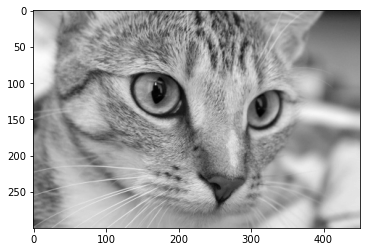

In [4]:
plt.imshow(gray_images['cat'], cmap = 'gray');

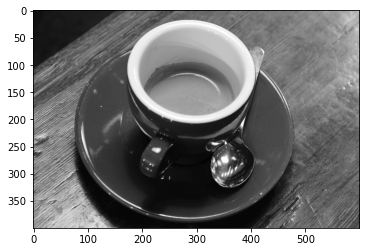

In [5]:
plt.imshow(gray_images['coffee'], cmap = 'gray');

In [6]:
print(gray_images['coffee'].shape)
print(gray_images['coffee'])

(400, 600)
[[0.05623333 0.05651608 0.04978902 ... 0.73961804 0.75166549 0.74579451]
 [0.05595059 0.05651608 0.05792275 ... 0.73905255 0.75081725 0.74297412]
 [0.05875608 0.05846549 0.05848824 ... 0.73905255 0.74494627 0.74886784]
 ...
 [0.52715216 0.64400353 0.58801529 ... 0.38923373 0.37580941 0.31533412]
 [0.61655255 0.59387137 0.58352824 ... 0.34640118 0.31699294 0.31195529]
 [0.58801529 0.57484392 0.5757     ... 0.34721176 0.30803373 0.29569569]]


#### Q1.

Implement a function that accepts two parameters: a matrix `img` and a scalar `k` that compresses an image via SVD.

Display the original image and the compressed image side-by-side. Make sure to also show the `k` and compression ratio (in %).

Play around with `k` and see how low you can go until you can't recognize the image anymore.

Finally, set $k = 20$ for submission purposes.

In [7]:
# Insert code here

def img_compress(img, k):  
    A = gray_images[img]
    AT_A = np.matmul(A.T,A)
    
    eigval, eigvec = np.linalg.eig(AT_A)
    li_sorted = sorted(zip(eigval, eigvec.T), key = lambda x: -x[0])
    
    li_k = li_sorted
    top_eigenvals = np.array([i[0] for i in li_k])
    
    sigma = np.diag(np.sqrt(np.abs(top_eigenvals)))
    
    V = np.matrix(np.array([i[1] for i in li_k])).T
    
    VT_inv = np.linalg.inv(V.T)
    
    U = np.matmul(np.matmul(A,VT_inv), np.linalg.inv(sigma))
    
    orig_A = np.matmul(np.matmul(U,sigma),V.T)
    orig_A = np.array(orig_A).real

    compressed = np.matmul(np.matmul(U[:,:k],sigma[:k,:k]),V.T[:k,:])

    n = U.shape[0]
    m = V.T.shape[1]
    C = 100 * ((k*(n+m)+k)/(n*m))
    
    fig, ax = plt.subplots(2,1,figsize=(10,10))
    
    
    ax[0].imshow(orig_A, cmap = 'gray')
    ax[0].set_title('Original Photo', fontsize='18')
    ax[1].imshow(compressed.real, cmap = 'gray');
    ax[1].set_title('Compressed Photo', fontsize='18')
    
    return f'Compression Ratio: {C:.2f}% at k:{k}'

'Compression Ratio: 59.13% at k:100'

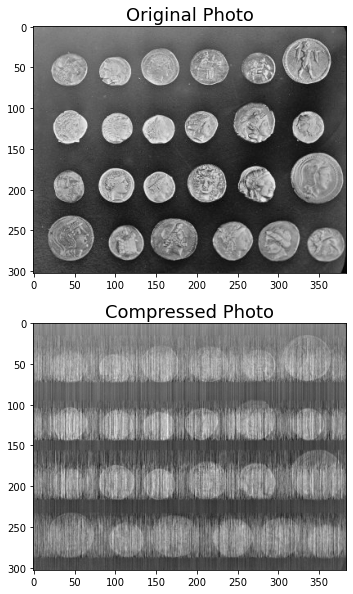

In [21]:
img_compress('coin',100)